In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [90]:
!ls

gender_submission.csv titanic.ipynb
test.csv              train.csv


In [91]:
!head gender_submission.csv

In [92]:
!head test.csv

In [72]:
df = pd.read_csv('train.csv', index_col='PassengerId')
df.columns = df.columns.str.lower()
df.index.name = 'id'
df.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
survived    891 non-null int64
pclass      891 non-null int64
name        891 non-null object
sex         891 non-null object
age         714 non-null float64
sibsp       891 non-null int64
parch       891 non-null int64
ticket      891 non-null object
fare        891 non-null float64
cabin       204 non-null object
embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [74]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
# columns with NA
df.isnull().sum().to_frame()

,0
survived,0
pclass,0
name,0
sex,0
age,177
sibsp,0
parch,0
ticket,0
fare,0
cabin,687


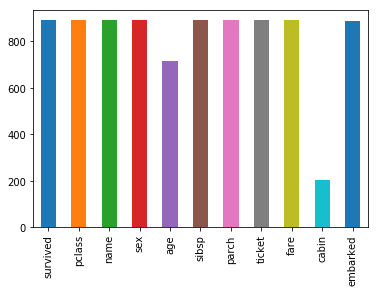

In [76]:
df.notnull().sum().plot(kind='bar')

In [77]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

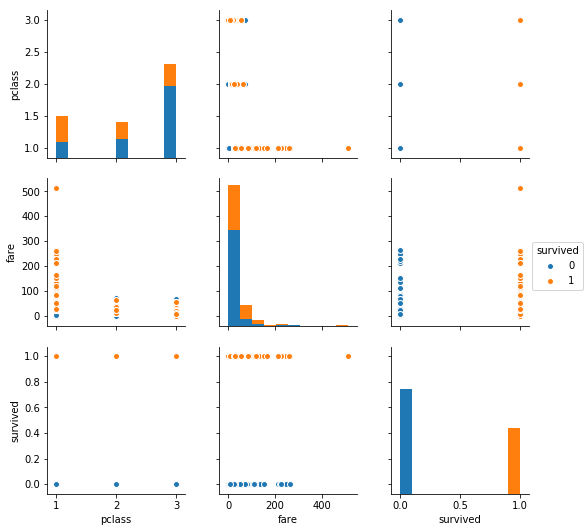

In [82]:
sns.pairplot(df[['pclass', 'sex', 'fare', 'survived']], hue='survived')

In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

In [87]:
X = df[['pclass']]
y = df['survived']
lr.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [88]:
test = pd.read_csv('test.csv', index_col='PassengerId')

In [109]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [111]:
df = pd.get_dummies(df, columns=['sex'])

In [122]:
df.drop('sex_female', axis=1)

,survived,pclass,name,age,sibsp,parch,ticket,fare,cabin,embarked,sex_male
id,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1
6,0,3,"Moran, Mr. James",NaN,0,0,330877,8.4583,NaN,Q,1
7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,S,1
8,0,3,"Palsson, Master. Gosta Leonard",2.0,3,1,349909,21.0750,NaN,S,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",27.0,0,2,347742,11.1333,NaN,S,0


In [127]:
from sklearn.model_selection import train_test_split
X = df[['pclass', 'fare', 'sex_female']]
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [128]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [120]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[121  23]
 [ 26  53]]
             precision    recall  f1-score   support

          0       0.82      0.84      0.83       144
          1       0.70      0.67      0.68        79

avg / total       0.78      0.78      0.78       223

